In [67]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [69]:
pres_2025_I = pd.read_csv(r"C:\Users\kgrab\Desktop\Python Jupyte Notebook\polish_district_election\pres_2025_I_data_set", sep=";",index_col='Unnamed: 0')
pres_2025_I.head()

,TERYT,district,entitled,voted,who_win,voter_turnout%
0,20100.0,bolesławiecki,65950,40879,PO,61.98
1,20200.0,dzierżoniowski,72535,43675,PO,60.21
2,20300.0,głogowski,63792,41226,PO,64.63
3,20400.0,górowski,25134,14218,PiS,56.57
4,20500.0,jaworski,36841,22097,PiS,59.98


In [71]:
pres_2025_I_GPT = pd.read_csv(r"C:\Users\kgrab\Desktop\Python Jupyte Notebook\polish_district_election\pres_2025_I_data_set_GPT.csv", sep=";")
pres_2025_I_GPT.head()

,TERYT,district,entitled,voted,who_win,voter_turnout%
0,20100.0,bolesławiecki,65950,40879,PO,61.98
1,20200.0,dzierżoniowski,72535,43675,PO,60.21
2,20300.0,głogowski,63792,41226,PO,64.63
3,20400.0,górowski,25134,14218,PiS,56.57
4,20500.0,jaworski,36841,22097,PiS,59.98


In [73]:
print(pres_2025_I['entitled'].sum())
print(pres_2025_I_GPT['entitled'].sum())

29252340
29252340


In [75]:
print(pres_2025_I['voted'].sum())
print(pres_2025_I_GPT['voted'].sum())

19692324
19692324


In [77]:
print(pres_2025_I['who_win'].value_counts())
print(pres_2025_I_GPT['who_win'].value_counts())

who_win
PiS    201
PO     181
Name: count, dtype: int64
who_win
PiS    201
PO     181
Name: count, dtype: int64


In [79]:
print(pres_2025_I['voter_turnout%'].mean())
print(pres_2025_I_GPT['voter_turnout%'].mean())

64.31607329842932
64.31607329842932


In [81]:
par_2023 = pd.read_csv(r"C:\Users\kgrab\Desktop\Python Jupyte Notebook\polish_district_election\par_2023_data_set", sep=";",index_col='Unnamed: 0')
par_2023.head()

,TERYT,district,entitled,voted,who_win,voter_turnout%
0,20100.0,bolesławiecki,66394,46532,PiS,70.08
1,20200.0,dzierżoniowski,74042,50915,PiS,68.77
2,20300.0,głogowski,64410,47427,PiS,73.63
3,20400.0,górowski,25337,16536,PiS,65.26
4,20500.0,jaworski,37390,25670,PiS,68.65


In [83]:
par_2023_GPT = pd.read_csv(r"C:\Users\kgrab\Desktop\Python Jupyte Notebook\polish_district_election\par_2023_data_set_GPT.csv", sep=";")
par_2023_GPT.head()

,TERYT,district,entitled,voted,who_win,voter_turnout%
0,20100.0,bolesławiecki,66394,46532,PiS,70.08
1,20200.0,dzierżoniowski,74042,50915,PiS,68.77
2,20300.0,głogowski,64410,47427,PiS,73.63
3,20400.0,górowski,25337,16536,PiS,65.26
4,20500.0,jaworski,37390,25670,PiS,68.65


In [85]:
print(par_2023['entitled'].sum())
print(par_2023_GPT['entitled'].sum())
print(par_2023['voted'].sum())
print(par_2023_GPT['voted'].sum())
print(par_2023['who_win'].value_counts())
print(par_2023_GPT['who_win'].value_counts())
print(par_2023['voter_turnout%'].mean())
print(par_2023_GPT['voter_turnout%'].mean())

29532595
29532595
21977411
21977411
who_win
PiS    266
PO     116
Name: count, dtype: int64
who_win
PiS    266
PO     116
Name: count, dtype: int64
71.56910994764398
71.56910994764398


In [87]:
powiaty = gpd.read_file("powiaty.geojson")
powiaty.head()

,id,nazwa,geometry
0,1,powiat ropczycko-sędziszowski,"MULTIPOLYGON (((21.6943 50.1785, 21.6944 50.17..."
1,2,powiat łosicki,"MULTIPOLYGON (((22.7238 52.2804, 22.7238 52.28..."
2,3,powiat piaseczyński,"MULTIPOLYGON (((21.1101 52.1132, 21.1088 52.11..."
3,4,powiat radomski,"MULTIPOLYGON (((20.9891 51.4895, 20.9892 51.48..."
4,5,powiat sierpecki,"MULTIPOLYGON (((19.5088 52.8678, 19.5087 52.86..."


In [88]:
powiaty['nazwa'] = powiaty['nazwa'].str.replace('(?i)powiat ','',regex=True)
powiaty.head()

,id,nazwa,geometry
0,1,ropczycko-sędziszowski,"MULTIPOLYGON (((21.6943 50.1785, 21.6944 50.17..."
1,2,łosicki,"MULTIPOLYGON (((22.7238 52.2804, 22.7238 52.28..."
2,3,piaseczyński,"MULTIPOLYGON (((21.1101 52.1132, 21.1088 52.11..."
3,4,radomski,"MULTIPOLYGON (((20.9891 51.4895, 20.9892 51.48..."
4,5,sierpecki,"MULTIPOLYGON (((19.5088 52.8678, 19.5087 52.86..."


In [89]:
mapa_2023 = powiaty.merge(par_2023, left_on='nazwa', right_on='district')
mapa_2023.head()

,id,nazwa,geometry,TERYT,district,entitled,voted,who_win,voter_turnout%
0,1,ropczycko-sędziszowski,"MULTIPOLYGON (((21.6943 50.1785, 21.6944 50.17...",181500.0,ropczycko-sędziszowski,56739,40549,PiS,71.47
1,2,łosicki,"MULTIPOLYGON (((22.7238 52.2804, 22.7238 52.28...",141000.0,łosicki,23294,16535,PiS,70.98
2,3,piaseczyński,"MULTIPOLYGON (((21.1101 52.1132, 21.1088 52.11...",141800.0,piaseczyński,148330,124131,PO,83.69
3,4,radomski,"MULTIPOLYGON (((20.9891 51.4895, 20.9892 51.48...",142500.0,radomski,115706,84670,PiS,73.18
4,5,sierpecki,"MULTIPOLYGON (((19.5088 52.8678, 19.5087 52.86...",142700.0,sierpecki,38730,26243,PiS,67.76


In [97]:
mapa_2023.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              399 non-null    int32   
 1   nazwa           399 non-null    object  
 2   geometry        399 non-null    geometry
 3   TERYT           399 non-null    float64 
 4   district        399 non-null    object  
 5   entitled        399 non-null    int64   
 6   voted           399 non-null    int64   
 7   who_win         399 non-null    object  
 8   voter_turnout%  399 non-null    float64 
dtypes: float64(2), geometry(1), int32(1), int64(2), object(3)
memory usage: 26.6+ KB


In [99]:
def kolor(r):
    base_color = '#0088FF' if r['who_win'] == 'PiS' else '#FF8800'
    rgb = mcolors.to_rgb(base_color)
    a = r['voter_turnout%']/100
    return_color = tuple([c*a for c in rgb])
    return return_color

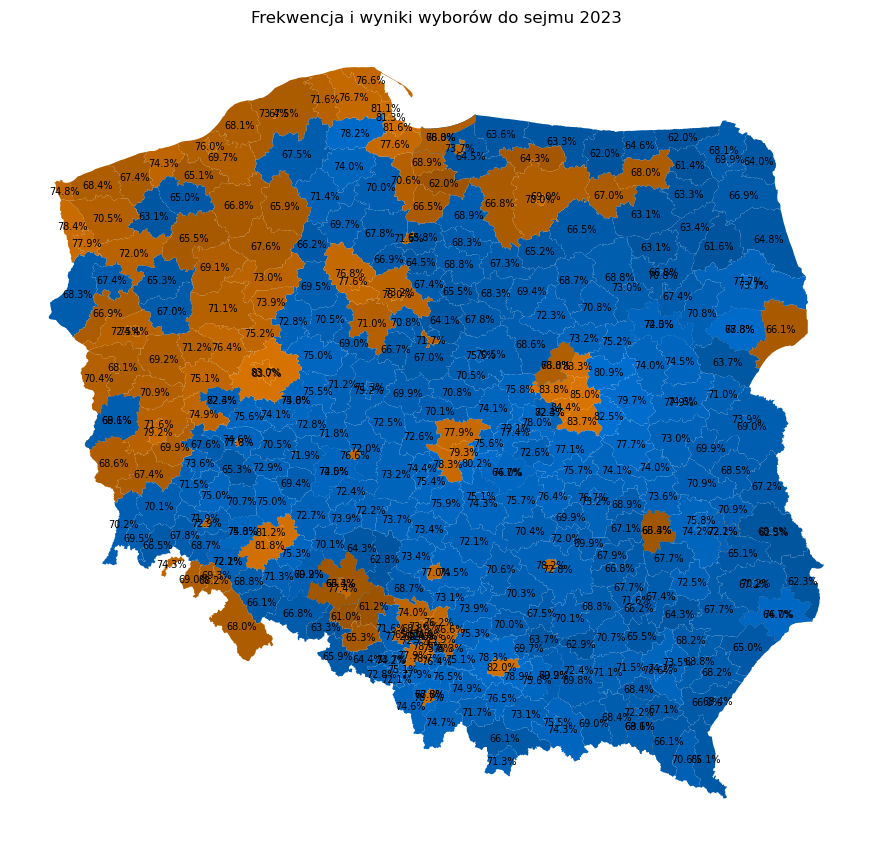

In [137]:
mapa_2023['col'] = mapa_2023.apply(kolor, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(11,11))
mapa_2023.plot(ax=ax, color=mapa_2023['col'])

for idx, r in mapa_2023.iterrows():
    if r['geometry'].is_empty:
        continue
    x,y = r['geometry'].centroid.x, r['geometry'].centroid.y
    text = f'{r['voter_turnout%']:.1f}%'
    ax.text(x,y,text,ha='center',va='center',fontsize=7,color='black')

plt.title('Frekwencja i wyniki wyborów do sejmu 2023')
plt.axis('off')
plt.show()

In [127]:
mapa_2025 = powiaty.merge(pres_2025_I, left_on='nazwa', right_on='district')
mapa_2025.head()

,id,nazwa,geometry,TERYT,district,entitled,voted,who_win,voter_turnout%
0,1,ropczycko-sędziszowski,"MULTIPOLYGON (((21.6943 50.1785, 21.6944 50.17...",181500.0,ropczycko-sędziszowski,56824,38726,PiS,68.15
1,2,łosicki,"MULTIPOLYGON (((22.7238 52.2804, 22.7238 52.28...",141000.0,łosicki,23019,15320,PiS,66.55
2,3,piaseczyński,"MULTIPOLYGON (((21.1101 52.1132, 21.1088 52.11...",141800.0,piaseczyński,151808,118136,PO,77.82
3,4,radomski,"MULTIPOLYGON (((20.9891 51.4895, 20.9892 51.48...",142500.0,radomski,116370,79286,PiS,68.13
4,5,sierpecki,"MULTIPOLYGON (((19.5088 52.8678, 19.5087 52.86...",142700.0,sierpecki,38246,23358,PiS,61.07


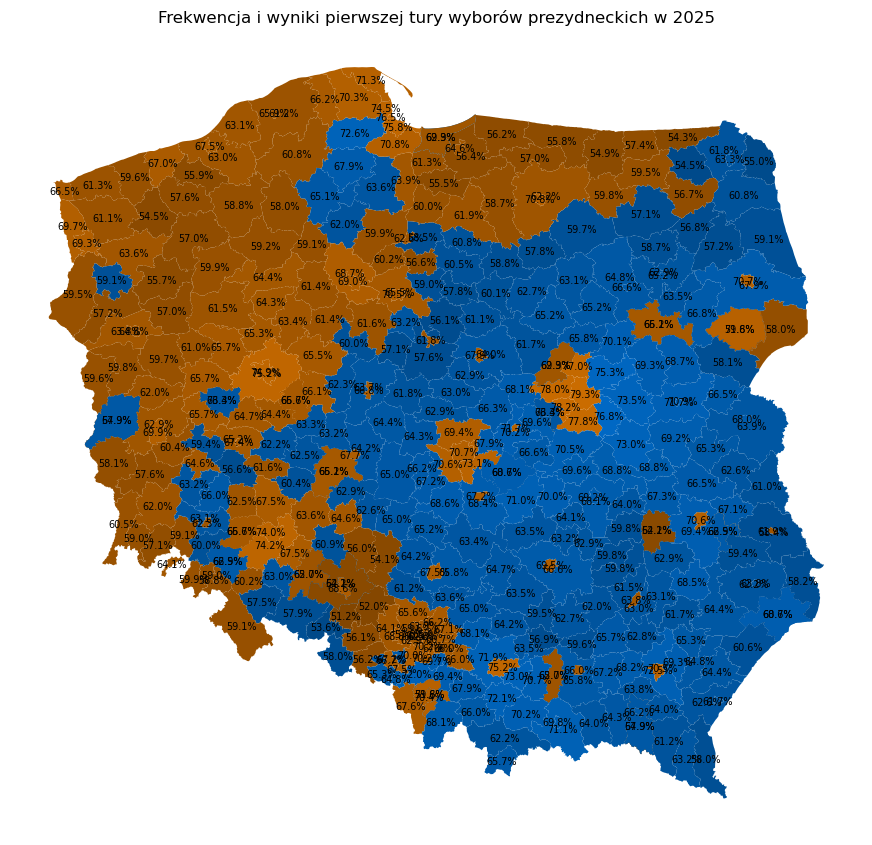

In [144]:
mapa_2025['col'] = mapa_2025.apply(kolor, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(11,11))
mapa_2023.plot(ax=ax, color=mapa_2025['col'])

for idx, r in mapa_2025.iterrows():
    if r['geometry'].is_empty:
        continue
    x,y = r['geometry'].centroid.x, r['geometry'].centroid.y
    text = f'{r['voter_turnout%']:.1f}%'
    ax.text(x,y,text,ha='center',va='center',fontsize=7,color='black')

plt.title('Frekwencja i wyniki pierwszej tury wyborów prezydneckich w 2025')
plt.axis('off')
plt.show()